# Winning Wrestlers Entertainment

In this notebook, I used four seperate csvs that were scraped from a wrestling database, merged the dataframe together, and then created charts to visualize a searchable wrestler's wins and losses over the course of four years.

In [87]:
# importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [88]:
# obtaining data from csv files
data_2013 = "../Resources/WWE-Data-2013.csv"
data_2014 = "../Resources/WWE-Data-2014.csv"
data_2015 = "../Resources/WWE-Data-2015.csv"
data_2016 = "../Resources/WWE-Data-2016.csv"

wwe_df_one = pd.read_csv(data_2013)
wwe_df_two = pd.read_csv(data_2014)
wwe_df_three = pd.read_csv(data_2015)
wwe_df_four = pd.read_csv(data_2016)

In [89]:
wwe_df_one.head()

,Wrestler,Wins,Losses,Draws
0,Daniel Bryan,177,37,6
1,Dean Ambrose,70,134,4
2,Antonio Cesaro,80,126,1
3,Seth Rollins,50,150,4
4,Randy Orton,129,63,8


In [90]:
combined_wwe_df = pd.merge(wwe_df_one, wwe_df_two, on="Wrestler", how="outer")
combined_wwe_df.head()

,Wrestler,Wins_x,Losses_x,Draws_x,Wins_y,Losses_y,Draws_y
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0


In [91]:
# Rename our _x columns
combined_wwe_df = combined_wwe_df.rename(columns={"Wins_x":"2013 Wins",
                                                 "Losses_x":"2013 Losses",
                                                 "Draws_x":"2013 Draws"})

# Rename our _y columns
combined_wwe_df = combined_wwe_df.rename(columns={"Wins_y":"2014 Wins",
                                                 "Losses_y":"2014 Losses",
                                                 "Draws_y":"2014 Draws"})
combined_wwe_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0


In [92]:
# merging the newly combined dataframe with the 2015 dataframe
combined_wwe_df = pd.merge(combined_wwe_df, wwe_df_three, on="Wrestler", how="outer")
combined_wwe_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0


In [93]:
# renaming new columns
combined_wwe_df = combined_wwe_df.rename(columns={"Wins":"2015 Wins",
                                                 "Losses":"2015 Losses",
                                                 "Draws":"2015 Draws"})
combined_wwe_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0


In [94]:
# Merge our newly combined dataframe with the 2016 dataframe
combined_wwe_df = pd.merge(combined_wwe_df, wwe_df_four, on="Wrestler", how="outer")
combined_wwe_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0


In [95]:
# renaming new columns
combined_wwe_df = combined_wwe_df.rename(columns={"Wins":"2016 Wins",
                                                 "Losses":"2016 Losses",
                                                 "Draws":"2016 Draws"})
combined_wwe_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Nikki Cross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5.0,0.0
266,Noah Potjes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,10.0,0.0
267,Cezar Bononi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,1.0
268,James Ellsworth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,0.0


In [96]:
# Replace all NaN values with 0
combined_wwe_df = combined_wwe_df.fillna(0)

# Creating new column "Total Wins"
combined_wwe_df["Total Wins"] = combined_wwe_df["2013 Wins"] + combined_wwe_df["2014 Wins"] + combined_wwe_df["2015 Wins"] + combined_wwe_df["2016 Wins"]

# Creating new column "Total Losses" 
combined_wwe_df["Total Losses"] = combined_wwe_df["2013 Losses"] + combined_wwe_df["2014 Losses"] + combined_wwe_df["2015 Losses"] + combined_wwe_df["2016 Losses"]

# Creating new column "Total Draws" 
combined_wwe_df["Total Draws"] = combined_wwe_df["2013 Draws"] + combined_wwe_df["2014 Draws"] + combined_wwe_df["2015 Draws"] + combined_wwe_df["2016 Draws"]

# Creating new column "Total Matches" 
combined_wwe_df["Total Matches"] = combined_wwe_df["Total Wins"] + combined_wwe_df["Total Losses"] + combined_wwe_df["Total Draws"]

combined_wwe_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0,263.0,60.0,8.0,331.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,150.0,1.0,236.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0


In [97]:
# Create a new dataframe for those wrestlers who have wrestled at least 100 matches,
# have at least one win in 2013,
# and have at least one win in 2016
winning_wrestlers = combined_wwe_df.loc[(combined_wwe_df["Total Matches"]>= 100) &
                                         (combined_wwe_df["2013 Wins"]> 0) & 
                                         (combined_wwe_df["2016 Wins"]> 0), :]

# Set the index of this new dataframe to be the wrestlers names
winning_wrestlers = winning_wrestlers.set_index("Wrestler")
winning_wrestlers.head()

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0,496.0,199.0,21.0,716.0
Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0,321.0,253.0,7.0,581.0


In [98]:
# search using user's input to gather data from our data frame
wrestler_search = input("Which wrestler do you want to see? ")

Which wrestler do you want to see?John Cena


In [103]:
# creates series that traces the searched wrestler's wins and losses from 2013 to 2016
wins_over_time = winning_wrestlers.loc[wrestler_search, ["2013 Wins", "2014 Wins", "2015 Wins","2016 Wins"]]
loss_over_time = winning_wrestlers.loc[wrestler_search, ["2013 Losses", "2014 Losses", "2015 Losses","2016 Losses"]]

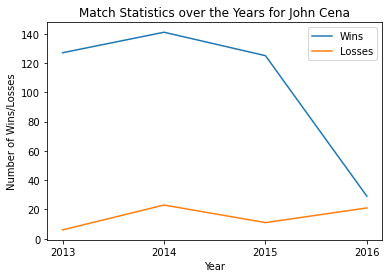

In [116]:
# list of the years that we will use as our x axis
x_axis = ["2013", "2014", "2015", "2016"]

# plots lines that will be used to track a wrestler's wins and losses over the years
plt.plot(x_axis, wins_over_time, label="Wins")
plt.plot(x_axis, loss_over_time, label="Losses")

# creates title, legend, labels
plt.title(f"Match Statistics over the Years for {wrestler_search}")
plt.xlabel("Year")
plt.ylabel("Number of Wins/Losses")
plt.legend(loc="best")

plt.show()